# Capstone 2: Narrative Analytics and Experimentation

In this project, I'll be using a very comprehensive PGA Tour statistics data set found on Kaggle. I will compare putting and driving statistics to see which one is more determinate of success on the Tour. The second aspect of this capstone will be to propose an experiment to further research the topic. 

My initial hypothesis is that better putting leads to more success. Putting and driving distance will be measured by rank on tour, which is already in the dataset, and success will be measured by percentage of holes played under par. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
df = pd.read_csv('C:\Thinkful\Capstone 2\PGA_Data_Historical.csv')

##show all the columns 
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

## Exploring the Data

In [2]:
df.head()

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100


The dataframe is set up in a multidemensional way so that statistic and variable correspond at the row level. This is difficult to interact with, so we can pivot the table to make it easier to work with.

In [3]:
##unstack the multi-levels in new dataframe
pga = df.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()
pga.head()

Variable     Player Name  Season % of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S) % of Potential Pts won - FedExCup Playoffs - (# OF WINS) % of Potential Pts won - FedExCup Playoffs - (%) % of Potential Pts won - FedExCup Playoffs - (EVENTS) % of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON) % of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS) % of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S) % of Potential Pts won - FedExCup Regular Season - (# OF WINS) % of Potential Pts won - FedExCup Regular Season - (%) % of Potential Pts won - FedExCup Regular Season - (EVENTS) % of Potential Pts won - FedExCup Regular Season - (POINTS WON) % of Potential Pts won - FedExCup Regular Season - (POTENTIAL PTS) 1-Putts per Round - (AVG) 1-Putts per Round - (ROUNDS) 1-Putts per Round - (TOTAL 1 PUTTS) 1-Putts per Round - (TOTAL ROUNDS) 11-25 Final Round Performance - (# OF TIMES IMPROVED) 11-25 Final Round Performance - (% TIMES IMPROVED) 11-25 Final Round Performance - (EVENTS) 2-Putts per Round - (AVG) 2-Putts per Round - (ROUNDS) 2-Putts per Round - (TOTAL 2 PUTTS) 2-Putts per Round - (TOTAL ROUNDS) 2019 PGA Championship Points - (EVENTS) 2019 PGA Championship Points - (POINTS) 25+ Final Round Performance - (# OF TIMES IMPROVED) 25+ Final Round Performance - (% TIMES IMPROVED) 25+ Final Round Performance - (EVENTS) 3+ Putts per Round - (AVG) 3+ Putts per Round - (ROUNDS) 3+ Putts per Round - (TOTAL 3+ PUTTS) 3+ Putts per Round - (TOTAL ROUNDS) 3-Putt Avoidance - (%) 3-Putt Avoidance - (ROUNDS) 3-Putt Avoidance - (TOTAL 3 PUTTS) 3-Putt Avoidance - (TOTAL HOLES (OVERALL)) 3-Putt Avoidance - 10-15' - (%) 3-Putt Avoidance - 10-15' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 10-15' - (ATTEMPTS) 3-Putt Avoidance - 10-15' - (ROUNDS) 3-Putt Avoidance - 10-15' - (TOTAL 3 PUTTS) 3-Putt Avoidance - 15-20' - (%) 3-Putt Avoidance - 15-20' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 15-20' - (ATTEMPTS) 3-Putt Avoidance - 15-20' - (ROUNDS) 3-Putt Avoidance - 15-20' - (TOTAL 3 PUTTS) 3-Putt Avoidance - 20-25' - (%) 3-Putt Avoidance - 20-25' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 20-25' - (ATTEMPTS) 3-Putt Avoidance - 20-25' - (ROUNDS) 3-Putt Avoidance - 20-25' - (TOTAL 3 PUTTS) 3-Putt Avoidance - 5-10' - (%) 3-Putt Avoidance - 5-10' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 5-10' - (ATTEMPTS) 3-Putt Avoidance - 5-10' - (ROUNDS) 3-Putt Avoidance - 5-10' - (TOTAL 3 PUTTS) 3-Putt Avoidance - Inside 5' - (%) 3-Putt Avoidance - Inside 5' - (2 PUTT OR BETTER %) 3-Putt Avoidance - Inside 5' - (ATTEMPTS) 3-Putt Avoidance - Inside 5' - (ROUNDS) 3-Putt Avoidance - Inside 5' - (TOTAL 3 PUTTS) 3-Putt Avoidance > 25' - (%) 3-Putt Avoidance > 25' - (2 PUTT OR BETTER %) 3-Putt Avoidance > 25' - (ATTEMPTS) 3-Putt Avoidance > 25' - (ROUNDS) 3-Putt Avoidance > 25' - (TOTAL 3 PUTTS) 3-Putts per Round - (AVG) 3-Putts per Round - (ROUNDS) 3-Putts per Round - (TOTAL 3 PUTTS) 3-Putts per Round - (TOTAL ROUNDS)  \
0         A.J. McInerney    2018                                                NaN                                                          NaN                                                    NaN                                                NaN                                                   NaN                                                               NaN                                                          NaN                                                                NaN                                                            NaN                                                    NaN                                                         NaN                                                             NaN                                       NaN                          NaN                                 NaN                                NaN                                                NaN                                                   NaN                                      NaN       

There is an exorbitant amount of stats here. The first step will be to narrow the amount of columns. Putting will be measured by rank of avg total putts per round, driving by rank of average distance, and success by percentage of birides or better. Total money earned and world golf ranking might be of interest to compare to later on.

In [4]:
##create putting, driving and success df and drop NaN values
putt_drive = (pga[['Player Name', 'Season', 'Putting Average - (GIR RANK)', 'Total Driving - (DISTANCE RANK)', 
                   'Birdie or Better Percentage - (%)', 'World Golf Ranking Points - (POINTS)',
                   'Total Money (Official and Unofficial) - (MONEY)']]).dropna()
putt_drive.head()

Variable,Player Name,Season,Putting Average - (GIR RANK),Total Driving - (DISTANCE RANK),Birdie or Better Percentage - (%),World Golf Ranking Points - (POINTS),Total Money (Official and Unofficial) - (MONEY)
1,Aaron Baddeley,2010,164,14,21.63,30,"879,317"
2,Aaron Baddeley,2011,T97,51,23.09,155,"$3,157,193"
3,Aaron Baddeley,2012,190,68,19.75,66,"$1,215,753"
4,Aaron Baddeley,2013,178,86,20.20,31,"$721,024"
5,Aaron Baddeley,2014,174,60,19.83,19,"$942,559"


Let's clean up the data.

In [5]:
##give columns cleaner names
(putt_drive.rename(columns = {'Total Money (Official and Unofficial) - (MONEY)':'Money',
                             'Putting Average - (GIR RANK)':'PuttingRank',
                             'Total Driving - (DISTANCE RANK)':'DrivingRank',
                             'Birdie or Better Percentage - (%)':'Percent Birdie or Better',
                             'World Golf Ranking Points - (POINTS)':'World Golf Ranking Pts'},
                             inplace = True))
#Remove $ and commas from Money
putt_drive['Money']= putt_drive['Money'].str.replace('$','')
putt_drive['Money']= putt_drive['Money'].str.replace(',','')
putt_drive['PuttingRank']= putt_drive['PuttingRank'].str.replace('T','')
putt_drive['DrivingRank']= putt_drive['DrivingRank'].str.replace('T','')
#Make all variables into numbers
for col in  putt_drive.columns[2:]:
   putt_drive[col] = putt_drive[col].astype(float)
putt_drive.head()

Variable,Player Name,Season,PuttingRank,DrivingRank,Percent Birdie or Better,World Golf Ranking Pts,Money
1,Aaron Baddeley,2010,164.0,14.0,21.63,30.0,879317.0
2,Aaron Baddeley,2011,97.0,51.0,23.09,155.0,3157193.0
3,Aaron Baddeley,2012,190.0,68.0,19.75,66.0,1215753.0
4,Aaron Baddeley,2013,178.0,86.0,20.20,31.0,721024.0
5,Aaron Baddeley,2014,174.0,60.0,19.83,19.0,942559.0


Let's verify that the putting and driving ranks have the same range.

In [9]:
sorted_putt = putt_drive.sort_values(by='PuttingRank')
sorted_putt.tail()

Variable,Player Name,Season,PuttingRank,DrivingRank,Percent Birdie or Better,World Golf Ranking Pts,Money
11050,Y.E. Yang,2012,189.0,146.0,18.28,23.0,454276.0
3,Aaron Baddeley,2012,190.0,68.0,19.75,66.0,1215753.0
1161,Brad Faxon,2010,190.0,190.0,17.91,1.0,120482.0
1001,Billy Hurley III,2012,191.0,185.0,16.26,17.0,479130.0
7353,Mike Weir,2010,192.0,184.0,18.03,26.0,645342.0


In [10]:
sorted_drive = putt_drive.sort_values(by='DrivingRank')
sorted_drive.tail()

Variable,Player Name,Season,PuttingRank,DrivingRank,Percent Birdie or Better,World Golf Ranking Pts,Money
1161,Brad Faxon,2010,190.0,190.0,17.91,1.0,120482.0
3582,Gavin Coles,2012,119.0,190.0,18.73,5.0,247561.0
2339,Craig Bowden,2010,178.0,191.0,15.58,3.0,140935.0
7611,Nick O'Hern,2012,143.0,191.0,17.19,16.0,489375.0
1426,Brian Gay,2010,171.0,192.0,19.16,63.0,1521663.0


Perfect, the max value for both putting and driving rank is 192.

Next, let's visualize the relationships between the variables and look at the correlations between the ranks and successful outcomes.

Text(0.5, 1, 'Birdie Percentage by Putting Rank')

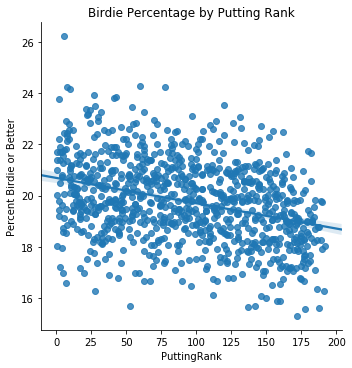

In [19]:
putt_plot = sns.lmplot(x='PuttingRank', y='Percent Birdie or Better', data=putt_drive)
plt.title('Birdie Percentage by Putting Rank')

Text(0.5, 1, 'Birdie Percentage by Driving Rank')

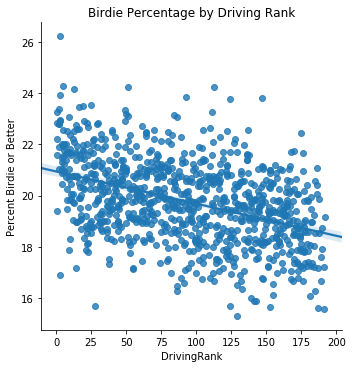

In [20]:
drive_plot = sns.lmplot(x='DrivingRank', y='Percent Birdie or Better', data=putt_drive)
plt.title('Birdie Percentage by Driving Rank')

As expected, the relationships are both inverse. -1 represents the perfect correlation in this case because a lower rank means higher quality.

In [12]:
putt_drive['PuttingRank'].corr(putt_drive['Percent Birdie or Better'])

-0.3278827253005421

In [13]:
putt_drive['DrivingRank'].corr(putt_drive['Percent Birdie or Better'])

-0.4179329779063665

Wow! Unexpectedly, driving rank seems to be more highly correlated to birdies than putting rank. We'll need to go deeper into the data to figure this out.

In [14]:
putt_drive.corr()

Variable,Season,PuttingRank,DrivingRank,Percent Birdie or Better,World Golf Ranking Pts,Money
Variable,,,,,,
Season,1.000000,-0.042047,-0.047158,-0.080986,-0.109430,0.046112
PuttingRank,-0.042047,1.000000,0.255187,-0.327883,-0.264865,-0.304573
DrivingRank,-0.047158,0.255187,1.000000,-0.417933,-0.173776,-0.200459
Percent Birdie or Better,-0.080986,-0.327883,-0.417933,1.000000,0.557785,0.612194
World Golf Ranking Pts,-0.109430,-0.264865,-0.173776,0.557785,1.000000,0.895513
Money,0.046112,-0.304573,-0.200459,0.612194,0.895513,1.000000


Counterintuitively, while driving rank is more closely associated with percentage of birdies, putting rank is more correlated to world golf ranking and money earned. One reason could be that better putters avoid really bad 'blow up' holes and score more consistently, which would be missed by only using the birdie statistic. 

From here, I would suggest more in-depth research into each one of these correlations by bringing in more statistics that might represent other factors on the golf course, such as "blow-up hole" avoidance and accuracy of shots, but I want to stay within the scope of this project.

## Research Proposal

Initially, I was prioritizing a specifically golf-related stat as the measure of success, percentage of holes played under par. While there's nothing wrong with this method, I think using money earned as the measure of success makes the findings more broadly relatable. This is will account for how players play in larger, more important tournaments that come with higher TV exposure and added pressure, because the outcomes of those tournaments have a much bigger impact on the golfer's career. 

In order to arrange this data into an AB test for this project, I propose the following: seperate each row of our putt_drive dataframe into a binary classification representing whether the golfer is more dependent on driving or putting. We can achieve this by creating a ratio between the driving and putting rank, and find the threshold somewhere around the median of that measurement to indicate into which classification the golfer would go. 

The next step would then be to calculate which group has made more money, which defines our success in this experiment. My hypothesis is that golfers who are better putters than they are drivers make more money on tour.

## Evaluation Plan

Using null hypothesis testing, we can calculate the difference of the groups to see how significant it is. Our null hypothesis is that whether a golfer is better at putting or driving has no effect on how much money he makes. For this experiment, if there is a two standard deviation difference between the amount of money the two groups made, we can confidently say that our null hypothesis is false.